In [7]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [42]:
#load data tables and models
path = '/Users/Lucy/Google Drive/MSDS/2016Fall/DSGA1006/Data'

#competition, investment files
test = pd.read_csv(path + '/unsupervised/evaluation_data.csv',index_col = 0)
comps = pd.read_csv(path + '/csv_export/competitors.csv')
train = pd.read_csv(path + '/unsupervised/trunc_clustering.csv',index_col = 0)

#set up model
vectorizer = TfidfVectorizer(max_df=0.5, max_features=10000, min_df=2, stop_words='english',use_idf=True)

In [43]:
train.head(2)

,company_uuid,company_name,company_category_list,category_group_list,short_description,description,founded_on,uuid,funding_rounds,funding_total_usd,status,homepage_url
0,2593028d-6633-21c4-6eb0-fa483675754c,Apsiyon,SaaS|Software,software,Online residence property management,Apsiyon is an internet startup offering softwa...,2011-06-01,2593028d-6633-21c4-6eb0-fa483675754c,2,2500000.0,operating,http://www.apsiyon.com
1,fe57be45-36ee-ed64-289a-a06ac3f10142,Fastudent,Education,education,Fastudent is the largest education portal in I...,Our mission is to provide efficient and effect...,2013-01-01,fe57be45-36ee-ed64-289a-a06ac3f10142,2,NaN,operating,http://www.fastudent.com/


In [44]:
test.head(2)

,company_uuid,company_name,company_category_list,category_group_list,short_description,description,founded_on,uuid,funding_rounds,funding_total_usd,status
19504,46f77ea4-6958-e53e-6b50-4921858b46da,India Housing,Real Estate,real estate,India Housing & property search engine & trans...,Building World's No.1 Real Estate focused vert...,2012-11-19,46f77ea4-6958-e53e-6b50-4921858b46da,3,720000.0,operating
18746,798363b7-d065-f289-3b87-c38f85cce795,Nu-Med Plus,Biotechnology|Medical Device,biotechnology|health care|science and engineering,Nu-Med Plus designs and markets technologies i...,Nu-Med Plus is a medical device development co...,2011-01-01,798363b7-d065-f289-3b87-c38f85cce795,4,289153.0,ipo


In [45]:
#get index and subset of train in the test set
train = train.reset_index()
train.rename(columns={'index': 'orig_index'}, inplace=True)
test_df = train[train.company_uuid.isin(test.company_uuid)]


In [46]:
test_df.head(2)

,orig_index,company_uuid,company_name,company_category_list,category_group_list,short_description,description,founded_on,uuid,funding_rounds,funding_total_usd,status,homepage_url
0,0,2593028d-6633-21c4-6eb0-fa483675754c,Apsiyon,SaaS|Software,software,Online residence property management,Apsiyon is an internet startup offering softwa...,2011-06-01,2593028d-6633-21c4-6eb0-fa483675754c,2,2500000.0,operating,http://www.apsiyon.com
7,11,86b95953-4e19-100b-236f-15bd88f3eb6f,AppNexus,Advertising|Internet|Service Industry,advertising|internet services|sales and marketing,AppNexus is a technology company whose cloud-b...,AppNexus is a technology company whose cloud-b...,2007-09-01,86b95953-4e19-100b-236f-15bd88f3eb6f,9,319171856.0,operating,http://www.appnexus.com


In [47]:
comps.head(2)

,entity_uuid,competitor_uuid,created_at,updated_at
0,28645410-a4cc-78fb-c494-41a1fac7eae5,1601923d-5297-e5e0-108e-5ac26c0e1440,2016-09-29 08:00:55.849547,2016-09-29 08:00:55.849107
1,003cc226-13e6-c9cc-51d6-77ee9ead3e67,57fbc481-1fa5-fd44-aa5b-f9523c4b7df9,2016-09-29 02:38:06.760389,2016-09-29 02:38:06.760122


In [5]:
#tfidf transform
X = vectorizer.fit_transform(train.description.astype(str))

In [48]:
test_df.shape

(2665, 13)

In [27]:
temp = cosine_similarity(X[1:1+1], X).flatten()
competitors = comps[comps.entity_uuid == test_df.company_uuid.iloc[1]]

In [33]:
set(competitors.competitor_uuid)

{'211cd373-87b6-483a-90b5-d19899084969',
 '53ca7470-e07e-d875-42c8-e6118fe78232',
 '7e353e03-a81b-eb86-0062-3d2bb308732a',
 '82bdbd44-40db-f758-b78c-511e13bcfa40',
 'a16838c2-639a-ffd3-1089-7f88a756d38d',
 'c6ada997-7734-0e9f-4f30-77e248eeae5e'}

In [38]:
train[train.uuid == test_df.iloc[1].uuid]

,index,company_uuid,company_name,company_category_list,category_group_list,short_description,description,founded_on,uuid,funding_rounds,funding_total_usd,status,homepage_url
7,11,86b95953-4e19-100b-236f-15bd88f3eb6f,AppNexus,Advertising|Internet|Service Industry,advertising|internet services|sales and marketing,AppNexus is a technology company whose cloud-b...,AppNexus is a technology company whose cloud-b...,2007-09-01,86b95953-4e19-100b-236f-15bd88f3eb6f,9,319171856.0,operating,http://www.appnexus.com


In [49]:
indices = list(train[train.company_uuid.isin(competitors.competitor_uuid)].index)

In [52]:
indices = [7,158,220]

In [53]:
temp[indices]

array([ 0.        ,  0.        ,  0.02631849])

In [62]:
temp

array([ 0.        ,  0.        ,  0.        , ...,  0.27116176,
        0.37004468,  1.        ])

In [63]:
temp.sort()

In [64]:
temp[-2]

0.37004468087920878

In [65]:
scores = np.zeros((test_df.shape[0],train.shape[0]))
max_score = np.zeros(test_df.shape[0])
comp_scores = []
i = 0
for index, row in test_df.iterrows(): 
    scores[i] = cosine_similarity(X[index:index+1], X).flatten()
    
    competitors = comps[comps.entity_uuid == row.company_uuid]
    competitor_indices = list(train[train.company_uuid.isin(competitors.competitor_uuid)].index)
    _comp_scores = scores[i][competitor_indices]
    comp_scores.append(_comp_scores)
    
    sorted_scores = scores[i].copy()
    sorted_scores.sort()
    max_score[i] = sorted_scores[-2]
    
    i = i + 1
    

In [81]:
rel_scores = []
all_rel_scores = []
for num,denom in zip(comp_scores,max_score):
    _ratio = np.array(num / denom)
    avg_ratio = _ratio.mean()
    median_ratio = np.median(_ratio)
    count_comp = len(_ratio)
    rel_scores.append([avg_ratio, median_ratio, count_comp])
    all_rel_scores += list(_ratio)

<IPython.core.display.Javascript object>


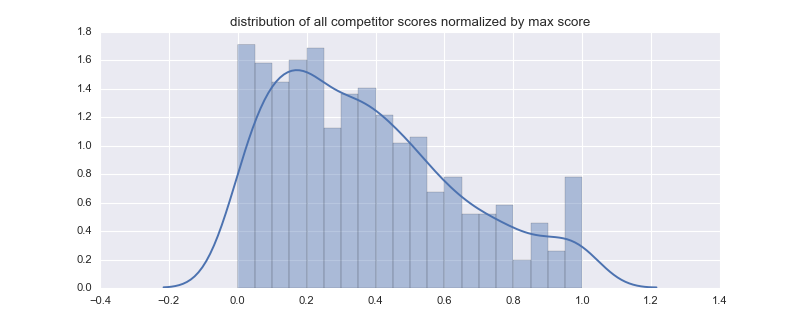

In [92]:
plt.figure(figsize=(10,4))
sn.distplot(all_rel_scores, bins = 20, kde = True)
sn.plt.title('distribution of all competitor scores normalized by max score')

<IPython.core.display.Javascript object>


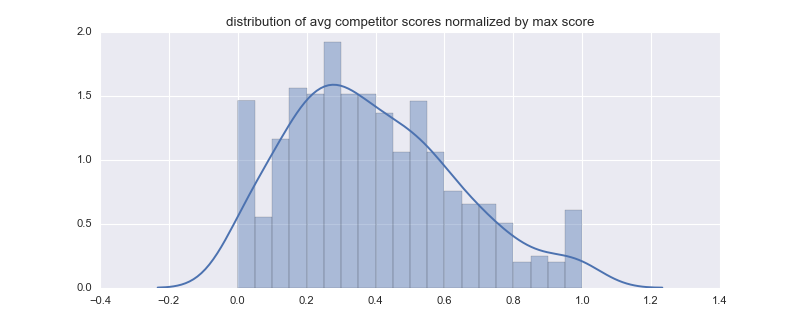

In [98]:
plt.figure(figsize=(10,4))
sn.distplot([x for x in list(zip(*rel_scores)[0]) if str(x) != 'nan'], bins = 20, kde = True)
sn.plt.title('distribution of avg competitor scores normalized by max score')

In [103]:
#average comp scores
np.array([x for x in list(zip(*rel_scores)[0]) if str(x) != 'nan']).mean()

0.39229133596574306

<IPython.core.display.Javascript object>


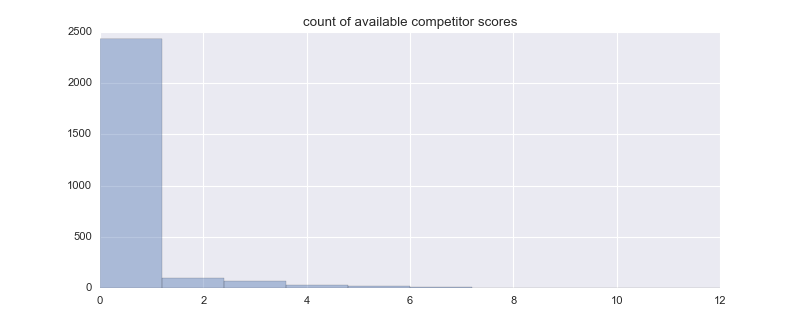

In [102]:
plt.figure(figsize=(10,4))
sn.distplot([x for x in list(zip(*rel_scores)[2]) if str(x) != 'nan'], bins = 10, kde = False)
sn.plt.title('count of available competitor scores')

## individual comparisons

* uber vs lyft
* plated vs blue apron
* postmates vs. doordash
* tableau vs platfora
* ayasdi vs trifacta
* cuyana vs everlane

In [114]:
company_list = ['uber','lyft','plated','blue apron','postmates',
                'doordash','tableau','platfora','ayasdi',
                'trifacta','warby parker','everlane']
ind_test = train[train.company_name.str.lower().isin(company_list)]

In [116]:
score_index = []
for comp in company_list:
    score_index.append(train[train.company_name.str.lower() == comp].index[0])

In [117]:
d = {'company': company_list, 'score_index': score_index}
ind_df = pd.DataFrame(data = d)

In [119]:
ind_df['pairs'] = [1,1,2,2,3,3,4,4,5,5,6,6]

In [143]:
comp_df = pd.merge(ind_df, ind_df, on = 'pairs').loc[[1,5,9,13,17,21]]


In [142]:
score = []
max_score_x = []
max_score_y = []
for index, row in comp_df.iterrows():
    score.append(cosine_similarity(X[row.score_index_x], 
                                   X[row.score_index_y])[0][0])
    scores = cosine_similarity(X[row.score_index_x:row.score_index_x + 1], X).flatten()
    sorted_scores = scores.copy()
    sorted_scores.sort()
    max_score_x.append(sorted_scores[-2])
    scores = cosine_similarity(X[row.score_index_y:row.score_index_y + 1], X).flatten()
    sorted_scores = scores.copy()
    sorted_scores.sort()
    max_score_y.append(sorted_scores[-2])
    

In [144]:
comp_df['similarity_score'] = score
comp_df['max_score_x'] = max_score_x
comp_df['max_score_y'] = max_score_y

In [145]:
comp_df

,company_x,score_index_x,pairs,company_y,score_index_y,similarity_score,max_score_x,max_score_y
1,uber,1669,1,lyft,5790,0.076088,0.606930,0.270373
5,plated,8861,2,blue apron,9578,0.212054,0.289848,0.317988
9,postmates,209,3,doordash,4011,0.101033,0.197013,0.369435
13,tableau,22722,4,platfora,6185,0.091195,0.288375,0.279101
17,ayasdi,10997,5,trifacta,3266,0.226305,0.262626,0.367056
21,warby parker,112,6,everlane,20639,0.000000,0.358605,0.332268


In [151]:
train['lower_company_name'] = train.company_name.str.lower()
add_x_desc = pd.merge(comp_df,train[['lower_company_name','description']],
                      left_on = 'company_x',right_on = 'lower_company_name')

In [152]:
add_y_desc = pd.merge(add_x_desc,train[['lower_company_name','description']],
                      left_on = 'company_y',right_on = 'lower_company_name')

In [154]:
final_comp_df = add_y_desc[['company_x','description_x','company_y','description_y','similarity_score',
                           'max_score_x','max_score_y']]

In [156]:
pd.set_option('display.max_colwidth', -1)
final_comp_df

,company_x,description_x,company_y,description_y,similarity_score,max_score_x,max_score_y
0,uber,"Uber, a [San Francisco](/location/san-francisco/528f5e3c90d111115d1c2e4ff979d58e)-based technology startup, is innovating at the intersection of lifestyle and logistics. Uber connects riders with safe, reliable, convenient transportation providers at a variety of price-points in cities around the world.",lyft,"Zimride re-incorporated as Lyft, Inc. in May, 2012.\r\n\r\nLyft is a peer-to-peer transportation platform that connects passengers who need rides with drivers willing to provide rides using their own personal vehicles. \r\n\r\nLyft was started in 2012 with the mission of building a peer-to-peer transportation solution that would help make cities safer, more affordable and better connected. Lyft now operates in 68 cities across the U.S.\r\n\r\nWhen using Lyft, passengers have three options when it comes to choosing their ride: Lyft: the original offering that matches a passenger (and their friends) with a driver nearby; Lyft Line (currently available in San Francisco and Los Angeles): shared rides along shared routes, priced for daily use. Once passengers set their destination, Lyft will connect them to a ride already going the same way; and Lyft Plus: Lyft's six-passenger ride for when passengers need more space, or want to roll with more of their friends. \r\n\r\nLyft Inc. launched out of Zimride, Inc. in 2012 and is based in San Francisco. In May 2013, Lyft sold Zimride to Enterprise Holdings.",0.076088,0.606930,0.270373
1,plated,"Plated is redefining weeknight dinner. Through weekly chef-designed menus, they're helping America eat and live better.",blue apron,"Blue Apron is a New York-based start-up that is changing the way people cook at home. Our weekly subscription service delivers everything you need to make fresh meals. We go shopping for our customers at wholesale, and deliver all the ingredients in exactly the right proportions, along with beautifully printed recipe cards. It's like having your own private chef-- you'll discover new recipes, eat fresher food, and save both time and money.",0.212054,0.289848,0.317988
2,postmates,"Postmates is the leading on-demand logistics provider. With more \r\nthan 20,000 active Postmates, the company operates the largest on-demand \r\ndelivery fleet in 40 major US metropolitan markets. Postmates overall \r\nmission to power local, on-demand logistics focused on fast deliveries from \r\nany type of merchant at scale. With collaborations with Starbucks, \r\nChipotle, 7-Eleven, Walgreens and Apple, Postmates is in line with that \r\nmission. The company was founded in 2011 by Bastian Lehmann, Sean Plaice \r\nand Sam Street. The company has raised $130M to date from investors \r\nincluding Tiger Global Management, Slow Ventures, Spark Capital, Founders \r\nFund, Matrix Partners, Scott Banister, Naval Ravikant, Russell Simmons, \r\nThomas Korte, Shervin Pishevar and David Sacks. For more information, \r\nplease visit www.postmates.com.",doordash,"DoorDash enables delivery in areas where it was not previously available. The company's mission is to empower small business owners to offer delivery in an affordable and convenient way. We are achieving this mission first by enabling restaurant food delivery.\r\n\r\nDoorDash was founded in February 2013 by four Stanford students with experiences from Facebook, Square, Vevo, and eBay.",0.101033,0.197013,0.369435
3,tableau,"Tableau Software, a public company (NYSE:DATA) based in Seattle, provides easy-to-use software applications for fast analytics and visualization. Its products include Tableau Desktop and Tableau Server.",platfora,"Platfora’s mission is to empower customers to transform their businesses into fact-based enterprises. Platfora's Big Data Analytics Platform masks the complexity of Hadoop, making it easy for customers to understand all the facts in their business across events, actions, behaviors and time.",0.091195,0.288375,0.